# Pymaceuticals Inc.
---

## Analysis
* This is a great spot to put your final analysis

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata, study_results,how='outer', on='Mouse ID')

# Display the data table for preview
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(combined_results_df["Mouse ID"].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplate_mice = combined_results_df[combined_results_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_results_df = combined_results_df[combined_results_df["Mouse ID"] != "g989"]

In [5]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(cleaned_results_df["Mouse ID"].unique())
num_mice

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

tv_mean_series = cleaned_results_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
tv_median_series = cleaned_results_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
tv_var_series = cleaned_results_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
tv_std_series = cleaned_results_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
tv_sem_series = cleaned_results_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

tumor_volume_df = pd.DataFrame(
    {
        "Mean Tumor Volume": tv_mean_series,
        "Median Tumor Volume": tv_median_series,
        "Tumor Volume Variance":tv_var_series,
        "Tumor Volume Std. Dev.":tv_std_series,
        "Tumor Volume Std. Err.":tv_sem_series
    }
)

tumor_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

tumor_volume_df_2 = cleaned_results_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

tumor_volume_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

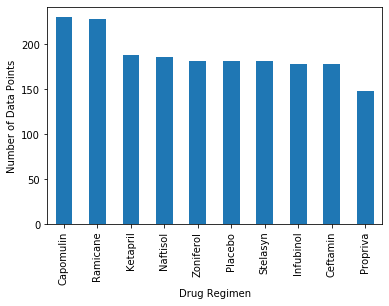

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

cleaned_results_df["Drug Regimen"].value_counts().plot(kind='bar')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

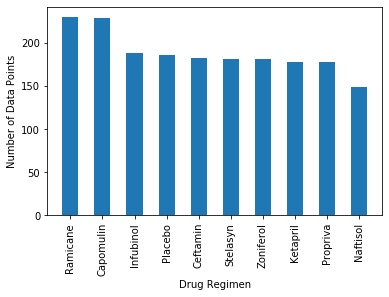

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_series = cleaned_results_df["Drug Regimen"].value_counts()
drugs = cleaned_results_df["Drug Regimen"].unique()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.bar(drugs, drug_series,width=0.5)

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Data Points')
ax.set_xticklabels(drugs,rotation=90)

plt.show()

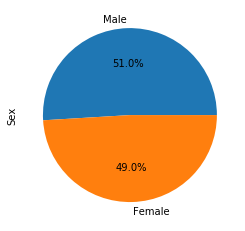

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

cleaned_results_df["Sex"].value_counts().plot(kind='pie',autopct='%1.1f%%')

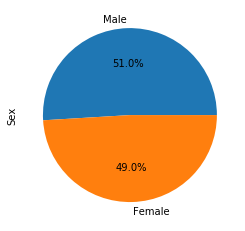

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = cleaned_results_df["Sex"].value_counts()

#plt.pie(gender, labels=['male', 'female'])
#plt.show()

fig1,ax1 = plt.subplots()
ax1.pie(gender, labels=['Male', 'Female'], autopct='%1.1f%%')
ax1.set_ylabel('Sex')

plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
drug_regimen = cleaned_results_df[cleaned_results_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infbinol", "Ceftamin"])]
last_tp = drug_regimen.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].last()

In [20]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = pd.merge(last_tp, cleaned_results_df, how="left", on="Mouse ID",suffixes=("_Max", "_Base"))

tumor_last_vol = tumor_df.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]

tumor_last_vol_reset =  tumor_last_vol.reset_index()
print(tumor_last_vol_reset)
tumor_last_vol_reset[tumor_last_vol_reset["Drug Regimen"] == "Capomulin"]

# combined_results_df[combined_results_df["Mouse ID"] != "g989"]

Drug Regimen Mouse ID  Tumor Volume (mm3)
0     Capomulin     b128           38.982878
1     Capomulin     b742           38.939633
2     Capomulin     f966           30.485985
3     Capomulin     g288           37.074024
4     Capomulin     g316           40.159220
..          ...      ...                 ...
70     Ramicane     s508           30.276232
71     Ramicane     u196           40.667713
72     Ramicane     w678           43.166373
73     Ramicane     y449           44.183451
74     Ramicane     z578           30.638696

[75 rows x 3 columns]


,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
5,Capomulin,i557,47.685963
6,Capomulin,i738,37.311846
7,Capomulin,j119,38.125164
8,Capomulin,j246,38.753265
9,Capomulin,l509,41.483008


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Capomulin_data = tumor_last_vol_reset[tumor_last_vol_reset["Drug Regimen"] == "Capomulin"]
#Ramicane_data = tumor_last_vol_reset[tumor_last_vol_reset["Drug Regimen"] == "Ramicane"]
#Infubinol_data = tumor_last_vol_reset[tumor_last_vol_reset["Drug Regimen"] == "Infubinol"]
#Ceftamin_data = tumor_last_vol_reset[tumor_last_vol_reset["Drug Regimen"] == "Ceftamin"]

quartiles = tumor_last_vol_reset.groupby('Drug Regimen')["Tumor Volume (mm3)"].quartiles([])
iqr =
outlier =
pot_outlier =

groupby('Drug Regimen')["Tumor Volume (mm3)"]
tumor_quartiles_df = pd.DataFrame(
    {
        "Quartiles": quartiles,
        "IQR": iqr,
        "Outlier Boundries":outlier,
        "Potential Outliers":pot_outlier
    }
)

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# What data do I need for the graph


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen